In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Bài 1

## a) Thực hiện lại các ví dụ ở trên.

### 2. Thao tác dữ liệu với DPLYR

In [2]:
df = pd.read_csv("./covid/covid_19_data.csv", index_col=0)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.head(3)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


#### 1. **Thao tác select trên dữ liệu**

##### 1. Lấy dữ liệu ở các thuộc tính bao gồm: `ObservationDate`, `Country.Region`, `Confirmed`, `Deaths`.

In [3]:
df[['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths']]

,ObservationDate,Country/Region,Confirmed,Deaths
SNo,,,,
1,2020-01-22,Mainland China,1.0,0.0
2,2020-01-22,Mainland China,14.0,0.0
3,2020-01-22,Mainland China,6.0,0.0
4,2020-01-22,Mainland China,1.0,0.0
5,2020-01-22,Mainland China,0.0,0.0
...,...,...,...,...
306425,2021-05-29,Ukraine,102641.0,2335.0
306426,2021-05-29,Netherlands,29147.0,245.0
306427,2021-05-29,Mainland China,1364.0,1.0


##### 2. Lấy dữ liệu về số ca hồi phục ở từng quốc gia, thuộc tính hiển thị gồm: `ObservationDate`, `Country.Region`, `Recovered`.

In [4]:
df[['ObservationDate', 'Country/Region', 'Recovered']]

,ObservationDate,Country/Region,Recovered
SNo,,,
1,2020-01-22,Mainland China,0.0
2,2020-01-22,Mainland China,0.0
3,2020-01-22,Mainland China,0.0
4,2020-01-22,Mainland China,0.0
5,2020-01-22,Mainland China,0.0
...,...,...,...
306425,2021-05-29,Ukraine,95289.0
306426,2021-05-29,Netherlands,0.0
306427,2021-05-29,Mainland China,1324.0


##### 3. Tính tổng số ca dương tính: sử dụng hàm sum(), thuộc tính: `Confirmed`.

In [5]:
sum(df['Confirmed'])

26252051758.0

##### 4. Tương tự câu 2, nhưng lấy ra 10 dòng đầu tiên:

In [6]:
df[['ObservationDate', 'Country/Region', 'Recovered']].head(10)

,ObservationDate,Country/Region,Recovered
SNo,,,
1,2020-01-22,Mainland China,0.0
2,2020-01-22,Mainland China,0.0
3,2020-01-22,Mainland China,0.0
4,2020-01-22,Mainland China,0.0
5,2020-01-22,Mainland China,0.0
6,2020-01-22,Mainland China,0.0
7,2020-01-22,Mainland China,0.0
8,2020-01-22,Mainland China,0.0
9,2020-01-22,Mainland China,0.0


#### 2. **Thao tác lọc dữ liệu trên filter**

##### 1. Lấy dữ liệu về số ca nhiễm ở `Mainland China`

In [7]:
df[df['Country/Region'] == 'Mainland China']

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306341,2021-05-29,Tibet,Mainland China,2021-05-30 04:20:55,1.0,0.0,1.0
306369,2021-05-29,Unknown,Mainland China,2021-05-30 04:20:55,0.0,0.0,10.0
306413,2021-05-29,Xinjiang,Mainland China,2021-05-30 04:20:55,980.0,3.0,977.0


##### 2. Lấy dữ liệu về số ca nhiễm của Việt Nam trong tháng 03 và tháng 04.

In [8]:
df[(df["Country/Region"] == "Vietnam") & (df["ObservationDate"] >= "2020-03-01") & (df["ObservationDate"] <= "2020-04-30")]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
2948,2020-03-01,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0
3078,2020-03-02,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0
3223,2020-03-03,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0
3381,2020-03-04,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0
3550,2020-03-05,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0
...,...,...,...,...,...,...,...
19094,2020-04-26,NaN,Vietnam,2020-04-27 02:31:20,270.0,0.0,225.0
19415,2020-04-27,NaN,Vietnam,2020-04-28 02:31:20,270.0,0.0,225.0
19740,2020-04-28,NaN,Vietnam,2020-04-29 02:32:29,270.0,0.0,222.0


#### 3. **Thao tác thống kê dữ liệu với summarise**

In [9]:
df[df['Country/Region'] == "Mainland China"]["Confirmed"].describe().round(3)

count    15758.000
mean      2590.595
std      11502.129
min          0.000
25%        170.000
50%        396.000
75%        948.000
max      68159.000
Name: Confirmed, dtype: float64

#### 4. **Thao tác gom nhóm dữ liệu với group_by**

#### Hiển thị dữ liệu theo từng ngày quan sát `ObservationDate` của Việt Nam trong 2 tháng: tháng 3 và tháng 4 năm 2020

In [10]:
df[(df["Country/Region"] == "Vietnam") & (df["ObservationDate"] >= "2020-03-01") & (df["ObservationDate"] <= "2020-04-30")].groupby(["ObservationDate"]).agg(list)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-03-01,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-02,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-03,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-04,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-05,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
...,...,...,...,...,...,...
2020-04-26,[nan],[Vietnam],[2020-04-27 02:31:20],[270.0],[0.0],[225.0]
2020-04-27,[nan],[Vietnam],[2020-04-28 02:31:20],[270.0],[0.0],[225.0]
2020-04-28,[nan],[Vietnam],[2020-04-29 02:32:29],[270.0],[0.0],[222.0]


#### 5. **Thao tác sắp xếp dữ liệu với arrange**

##### 1. Hiển thị dữ liệu theo từng ngày quan sát (thuộc tính ObservationDate) của Việt Nam trong 2 tháng: tháng 3 và tháng 4 năm 2020. Sắp xếp theo số ca dương tính tăng dần.

In [11]:
my_df = df[(df["Country/Region"] == "Vietnam") & (df["ObservationDate"] >= "2020-03-01") & (df["ObservationDate"] <= "2020-04-30")]
my_df = my_df.groupby(["ObservationDate"]).agg(list)
my_df = my_df.sort_values(['Confirmed'], ascending=True)
my_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-03-01,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-02,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-03,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-04,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-05,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
...,...,...,...,...,...,...
2020-04-26,[nan],[Vietnam],[2020-04-27 02:31:20],[270.0],[0.0],[225.0]
2020-04-27,[nan],[Vietnam],[2020-04-28 02:31:20],[270.0],[0.0],[225.0]
2020-04-28,[nan],[Vietnam],[2020-04-29 02:32:29],[270.0],[0.0],[222.0]


##### 2. Tương tự như trên, nhưng sắp xếp số ca dương tính giảm dần

In [12]:
my_df = df[(df["Country/Region"] == "Vietnam") & (df["ObservationDate"] >= "2020-03-01") & (df["ObservationDate"] <= "2020-04-30")]
my_df = my_df.groupby(["ObservationDate"]).agg(list)
my_df = my_df.sort_values(['Confirmed'], ascending=False)
my_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-04-30,[nan],[Vietnam],[2020-05-01 02:32:28],[270.0],[0.0],[219.0]
2020-04-29,[nan],[Vietnam],[2020-04-30 02:32:27],[270.0],[0.0],[222.0]
2020-04-28,[nan],[Vietnam],[2020-04-29 02:32:29],[270.0],[0.0],[222.0]
2020-04-27,[nan],[Vietnam],[2020-04-28 02:31:20],[270.0],[0.0],[225.0]
2020-04-26,[nan],[Vietnam],[2020-04-27 02:31:20],[270.0],[0.0],[225.0]
...,...,...,...,...,...,...
2020-03-03,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-02,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]
2020-03-05,[nan],[Vietnam],[2020-02-25T08:53:02],[16.0],[0.0],[16.0]


#### 6. **Thêm vào một thuộc tính mới sử dụng mutate**

In [13]:
my_df = df[(df["Country/Region"] == "Vietnam") & (df["ObservationDate"] >= "2020-03-01") & (df["ObservationDate"] <= "2020-04-30")]
my_df = my_df.sort_values(['Confirmed'], ascending=True)
my_df['Patients'] = my_df['Confirmed'] - my_df['Recovered']
my_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Patients
SNo,,,,,,,,
2948,2020-03-01,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0,0.0
3078,2020-03-02,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0,0.0
3223,2020-03-03,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0,0.0
3381,2020-03-04,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0,0.0
3550,2020-03-05,NaN,Vietnam,2020-02-25T08:53:02,16.0,0.0,16.0,0.0
...,...,...,...,...,...,...,...,...
19094,2020-04-26,NaN,Vietnam,2020-04-27 02:31:20,270.0,0.0,225.0,45.0
19415,2020-04-27,NaN,Vietnam,2020-04-28 02:31:20,270.0,0.0,225.0,45.0
19740,2020-04-28,NaN,Vietnam,2020-04-29 02:32:29,270.0,0.0,222.0,48.0


### 3. Làm sạch dữ liệu với TIDYR

In [14]:
df = pd.read_csv("./mtcars/mtcars.csv")
df.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


#### 1. **Thao tác gom dữ liệu với gather**

In [15]:
gathered = pd.melt(df, id_vars=['model'])
gathered

,model,variable,value
0,Mazda RX4,mpg,21.0
1,Mazda RX4 Wag,mpg,21.0
2,Datsun 710,mpg,22.8
3,Hornet 4 Drive,mpg,21.4
4,Hornet Sportabout,mpg,18.7
...,...,...,...
347,Lotus Europa,carb,2.0
348,Ford Pantera L,carb,4.0
349,Ferrari Dino,carb,6.0
350,Maserati Bora,carb,8.0


In [16]:
spread = pd.pivot(gathered,index='model', columns='variable', values='value')
spread

variable,am,carb,cyl,disp,drat,gear,hp,mpg,qsec,vs,wt
model,,,,,,,,,,,
AMC Javelin,0.0,2.0,8.0,304.0,3.15,3.0,150.0,15.2,17.30,0.0,3.435
Cadillac Fleetwood,0.0,4.0,8.0,472.0,2.93,3.0,205.0,10.4,17.98,0.0,5.250
Camaro Z28,0.0,4.0,8.0,350.0,3.73,3.0,245.0,13.3,15.41,0.0,3.840
Chrysler Imperial,0.0,4.0,8.0,440.0,3.23,3.0,230.0,14.7,17.42,0.0,5.345
Datsun 710,1.0,1.0,4.0,108.0,3.85,4.0,93.0,22.8,18.61,1.0,2.320
Dodge Challenger,0.0,2.0,8.0,318.0,2.76,3.0,150.0,15.5,16.87,0.0,3.520
Duster 360,0.0,4.0,8.0,360.0,3.21,3.0,245.0,14.3,15.84,0.0,3.570
Ferrari Dino,1.0,6.0,6.0,145.0,3.62,5.0,175.0,19.7,15.50,0.0,2.770
Fiat 128,1.0,1.0,4.0,78.7,4.08,4.0,66.0,32.4,19.47,1.0,2.200


#### 2. **Gom dữ liệu ở nhiều cột lại thành một cột sử dụng hàm unite**

In [17]:
data = {
    'date': pd.date_range(start='2016-01-01', periods=15).astype(str),
    'hour': np.random.randint(low=0, high=24, size=15).astype(str),
    'min': np.random.randint(low=0, high=60, size=15).astype(str),
    'second': np.random.randint(low=0, high=60, size=15).astype(str),
    'event': np.random.choice(list(string.ascii_lowercase), 15),
}

df = pd.DataFrame(data)
df

,date,hour,min,second,event
0,2016-01-01,18,55,48,a
1,2016-01-02,17,34,5,j
2,2016-01-03,18,14,26,a
3,2016-01-04,11,14,13,n
4,2016-01-05,11,58,49,s
5,2016-01-06,3,52,11,o
6,2016-01-07,21,56,35,k
7,2016-01-08,6,43,9,a
8,2016-01-09,17,23,32,q
9,2016-01-10,17,24,43,s


In [18]:
df['datetime'] = pd.to_datetime(df['date'] + " " + df['hour'] + ":" + df['min'] + ":" + df['second'])
df = df.drop(['date', 'hour', 'min', 'second'], axis=1)

In [19]:
df

,event,datetime
0,a,2016-01-01 18:55:48
1,j,2016-01-02 17:34:05
2,a,2016-01-03 18:14:26
3,n,2016-01-04 11:14:13
4,s,2016-01-05 11:58:49
5,o,2016-01-06 03:52:11
6,k,2016-01-07 21:56:35
7,a,2016-01-08 06:43:09
8,q,2016-01-09 17:23:32
9,s,2016-01-10 17:24:43


#### 3. **Tách dữ liệu ra ở một cột thành nhiều cột sử dụng hàm separate**

In [20]:
df['date'], df['time'] = df['datetime'].astype(str).str.split(" ").str
df['hour'], df['minute'], df['second'] = df['time'].str.split(":").str
df = df.drop(['datetime', 'time'], axis=1)

/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_28940/1857555043.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['date'], df['time'] = df['datetime'].astype(str).str.split(" ").str
/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_28940/1857555043.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['hour'], df['minute'], df['second'] = df['time'].str.split(":").str


In [21]:
df

,event,date,hour,minute,second
0,a,2016-01-01,18,55,48
1,j,2016-01-02,17,34,05
2,a,2016-01-03,18,14,26
3,n,2016-01-04,11,14,13
4,s,2016-01-05,11,58,49
5,o,2016-01-06,03,52,11
6,k,2016-01-07,21,56,35
7,a,2016-01-08,06,43,09
8,q,2016-01-09,17,23,32
9,s,2016-01-10,17,24,43


### 4. Thao tác với ngày tháng sử dụng thư viện lubridate

In [22]:
df = pd.read_csv("./covid/covid_19_data.csv", index_col=0)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.head(3)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


#### 1. Lấy năm nhuận

In [23]:
df[df['ObservationDate'].dt.is_leap_year]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
192462,2020-12-31,Zaporizhia Oblast,Ukraine,2021-04-02 15:13:53,54088.0,594.0,20530.0
192463,2020-12-31,Zeeland,Netherlands,2021-04-02 15:13:53,10462.0,127.0,0.0
192464,2020-12-31,Zhejiang,Mainland China,2021-04-02 15:13:53,1306.0,1.0,1293.0


#### 2. Lấy năm

In [24]:
df['ObservationDate'].dt.year

SNo
1         2020
2         2020
3         2020
4         2020
5         2020
          ... 
306425    2021
306426    2021
306427    2021
306428    2021
306429    2021
Name: ObservationDate, Length: 306429, dtype: int64

#### 3. Lấy tháng

In [25]:
df['ObservationDate'].dt.month

SNo
1         1
2         1
3         1
4         1
5         1
         ..
306425    5
306426    5
306427    5
306428    5
306429    5
Name: ObservationDate, Length: 306429, dtype: int64

#### 4. Lấy ngày

In [26]:
df['ObservationDate'].dt.day

SNo
1         22
2         22
3         22
4         22
5         22
          ..
306425    29
306426    29
306427    29
306428    29
306429    29
Name: ObservationDate, Length: 306429, dtype: int64

#### 5. Định dạng ngày tháng

ymd()

In [27]:
df["ObservationDate"].dt.strftime('%Y-%m-%d')

SNo
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
5         2020-01-22
             ...    
306425    2021-05-29
306426    2021-05-29
306427    2021-05-29
306428    2021-05-29
306429    2021-05-29
Name: ObservationDate, Length: 306429, dtype: object

ymd_hms()

In [28]:
df['ObservationDate'].dt.strftime('%Y-%m-%d_%H:%M:%S')

SNo
1         2020-01-22_00:00:00
2         2020-01-22_00:00:00
3         2020-01-22_00:00:00
4         2020-01-22_00:00:00
5         2020-01-22_00:00:00
                 ...         
306425    2021-05-29_00:00:00
306426    2021-05-29_00:00:00
306427    2021-05-29_00:00:00
306428    2021-05-29_00:00:00
306429    2021-05-29_00:00:00
Name: ObservationDate, Length: 306429, dtype: object

mdy()

In [29]:
df["ObservationDate"].dt.strftime('%m-%d-%Y')

SNo
1         01-22-2020
2         01-22-2020
3         01-22-2020
4         01-22-2020
5         01-22-2020
             ...    
306425    05-29-2021
306426    05-29-2021
306427    05-29-2021
306428    05-29-2021
306429    05-29-2021
Name: ObservationDate, Length: 306429, dtype: object

dmy()

In [30]:
df["ObservationDate"].dt.strftime('%d-%m-%Y')

SNo
1         22-01-2020
2         22-01-2020
3         22-01-2020
4         22-01-2020
5         22-01-2020
             ...    
306425    29-05-2021
306426    29-05-2021
306427    29-05-2021
306428    29-05-2021
306429    29-05-2021
Name: ObservationDate, Length: 306429, dtype: object

hms()

In [31]:
df["ObservationDate"].dt.strftime('%H:%M:%S')

SNo
1         00:00:00
2         00:00:00
3         00:00:00
4         00:00:00
5         00:00:00
            ...   
306425    00:00:00
306426    00:00:00
306427    00:00:00
306428    00:00:00
306429    00:00:00
Name: ObservationDate, Length: 306429, dtype: object

#### 6. Lấy giờ hiện tại

In [32]:
pd.to_datetime('today').strftime("%H:%M:%S")

'22:15:47'

#### 7. Lấy ngày hiện tại

In [33]:
pd.to_datetime('today').strftime("%d/%m/%Y")

'22/05/2023'

#### 8. Lấy thứ hiện tại

In [34]:
pd.to_datetime('today').day_name()

'Monday'

#### 9. Lấy khoảng thời gian tiếp theo

In [35]:
pd.to_datetime('today') + pd.Timedelta(5, 'D')

Timestamp('2023-05-27 22:15:47.155290')

## b) Tìm dữ liệu về số ca nhiễm của Nhật Bản từ ngày 02/3/2021 đến ngày 15/03/2021

In [36]:
df = pd.read_csv("./covid/covid_19_data.csv", index_col=0)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.head(3)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


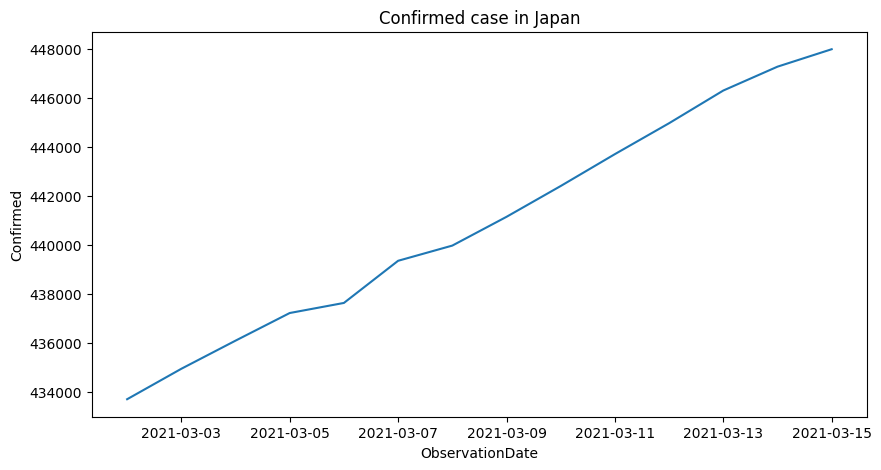

In [37]:
tmp_df = df[(df['Country/Region'] == 'Japan') & (df["ObservationDate"] >= "2021-03-02") & (df["ObservationDate"] <= "2021-03-15")].groupby(['ObservationDate'])["Confirmed"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data = tmp_df, x="ObservationDate", y="Confirmed")
plt.title('Confirmed case in Japan')
plt.show()

## c) Tìm dữ liệu về số ca nhiễm của Hoa Kỳ từ ngày 15/03/2021 đến ngày 15/04/2021

In [38]:
tmp_df = df[(df['Country/Region'] == 'US') & (df["ObservationDate"] >= "2021-03-15") & (df["ObservationDate"] <= "2021-04-15")]
tmp_df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
248468,2021-03-15,Alabama,US,2021-04-02 15:13:53,508229.0,10329.0,0.0
248470,2021-03-15,Alaska,US,2021-04-02 15:13:53,60655.0,306.0,0.0
248495,2021-03-15,Arizona,US,2021-04-02 15:13:53,833381.0,16553.0,0.0
248496,2021-03-15,Arkansas,US,2021-04-02 15:13:53,327060.0,5481.0,0.0
248539,2021-03-15,California,US,2021-04-02 15:13:53,3626027.0,56521.0,0.0
...,...,...,...,...,...,...,...
272736,2021-04-15,Virginia,US,2021-04-16 04:20:46,641626.0,10529.0,0.0
272746,2021-04-15,Washington,US,2021-04-16 04:20:46,381725.0,5362.0,0.0
272749,2021-04-15,West Virginia,US,2021-04-16 04:20:46,147596.0,2772.0,0.0


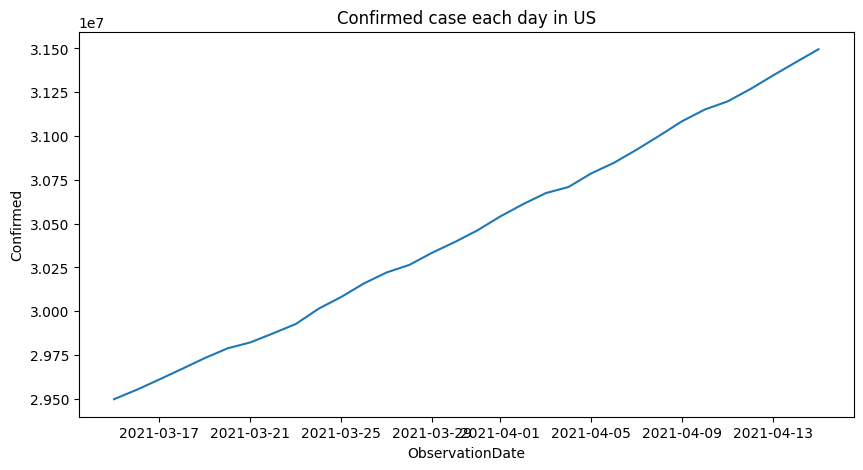

In [39]:
# Confirmed case each day
case_each_day = tmp_df.groupby(['ObservationDate'])["Confirmed"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data = case_each_day, x="ObservationDate", y="Confirmed")
plt.title('Confirmed case each day in US')
plt.show()

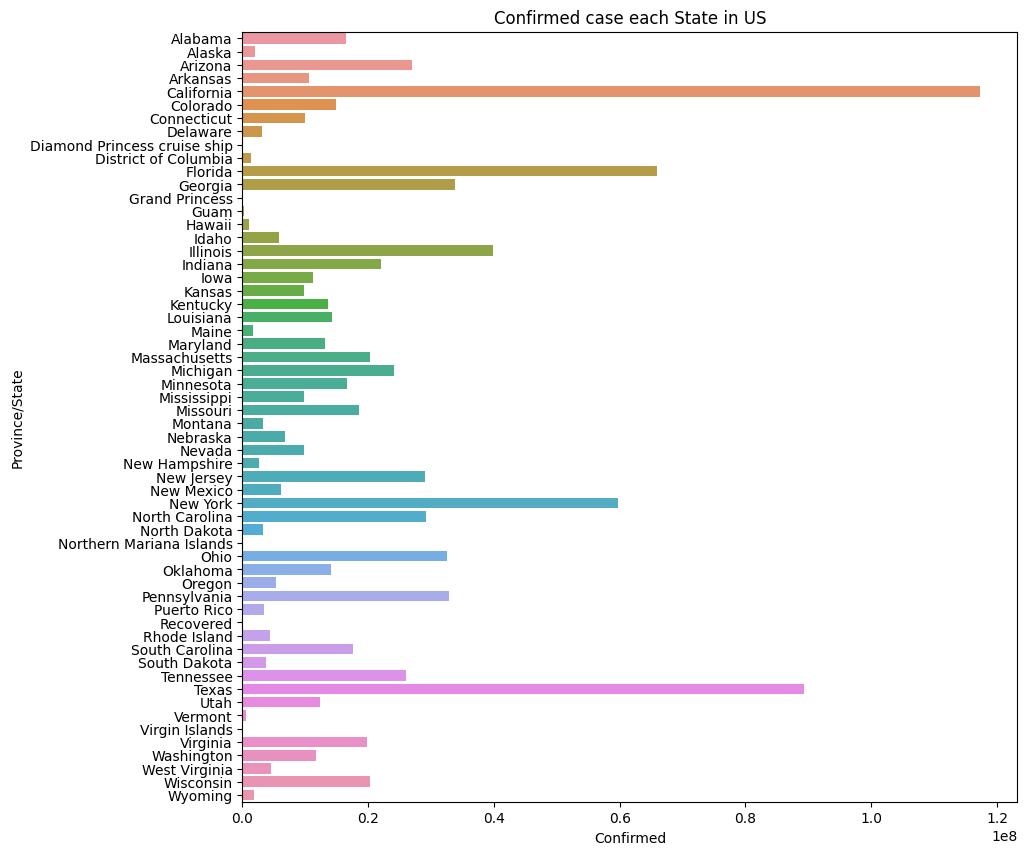

In [40]:
# Confirmed case each State
case_each_state = tmp_df.groupby(['Province/State'])["Confirmed"].sum().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data = case_each_state, x="Confirmed", y="Province/State")
plt.title('Confirmed case each State in US')
plt.show()

# Bài 2

Thống kê số ca nhiễm mới của thế giới theo từng ngày, từ tháng 02 đến tháng 04 của năm 2020. 

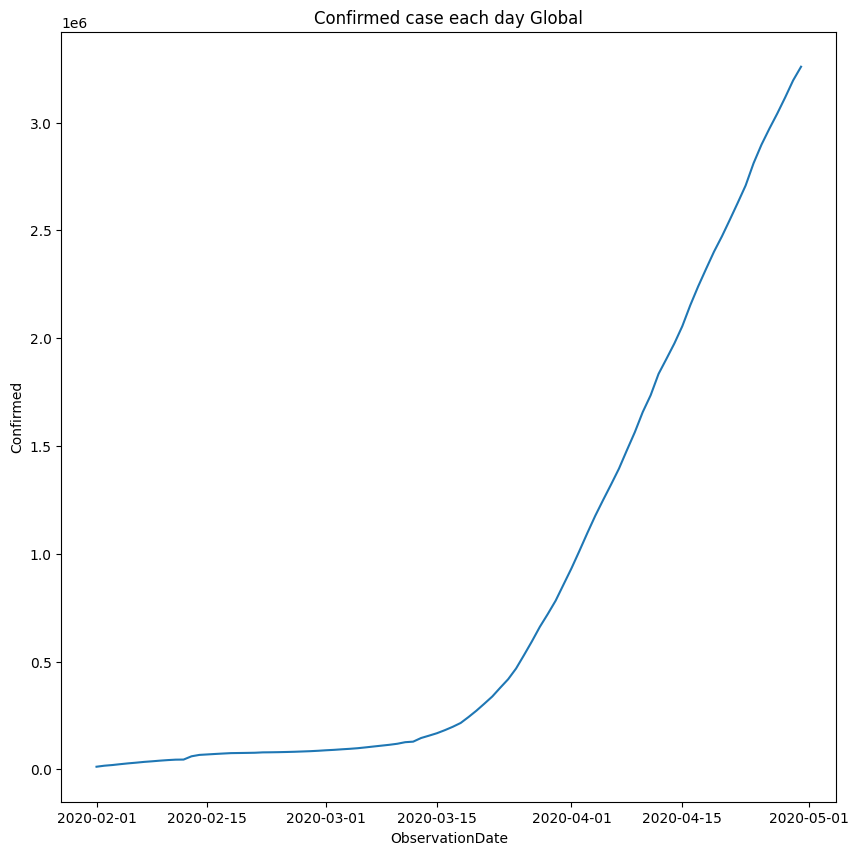

In [41]:
tmp_df = df[(df["ObservationDate"] >= "2020-02-1") & (df["ObservationDate"] <= "2020-04-30")].groupby(['ObservationDate'])['Confirmed'].sum().reset_index()
plt.figure(figsize=(10,10))
sns.lineplot(data = tmp_df, x="ObservationDate", y="Confirmed")
plt.title('Confirmed case each day Global')
plt.show()

# Bài 3

Thống kê số ca nhiễm mới của Việt Nam theo từng tháng trong năm 2021. Vẽ biểu đồ số ca nhiễm theo từng tháng (biểu đồ đường)

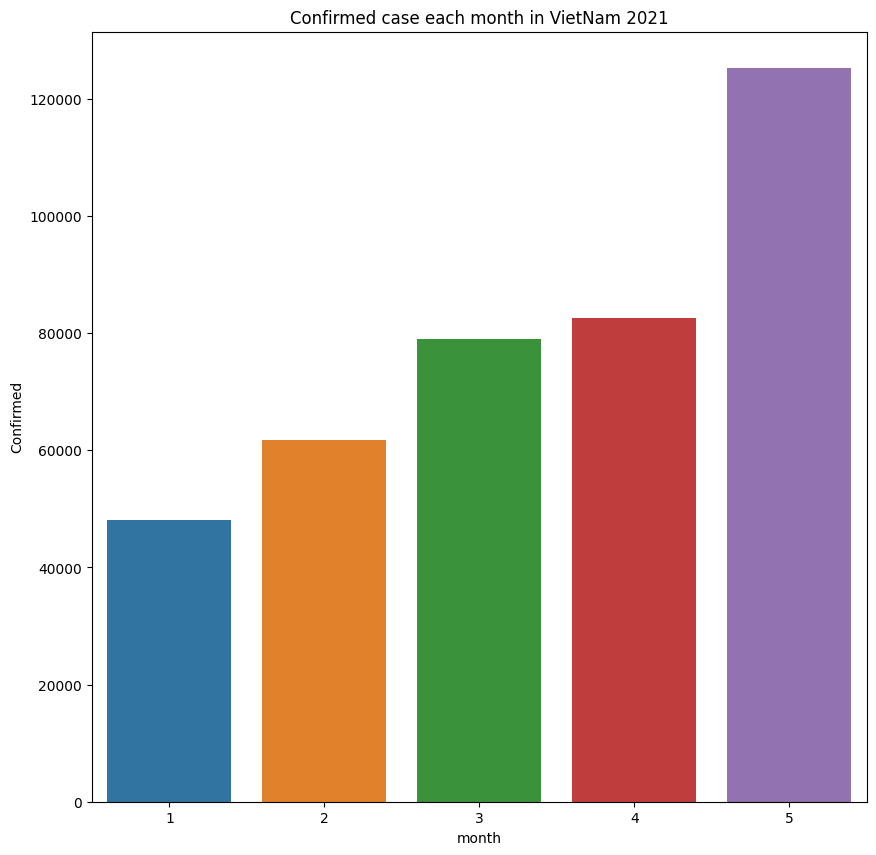

In [42]:
tmp_df = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"].dt.year == 2021)].copy()
tmp_df['month']  = tmp_df['ObservationDate'].dt.month
tmp_df = tmp_df.groupby(['month'])['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=tmp_df, x='month', y='Confirmed')
plt.title("Confirmed case each month in VietNam 2021")
plt.show()

# Bài 4

Thống kê số ca nhiễm mới của Việt nam theo từng thứ trong tháng 04 năm 2020.

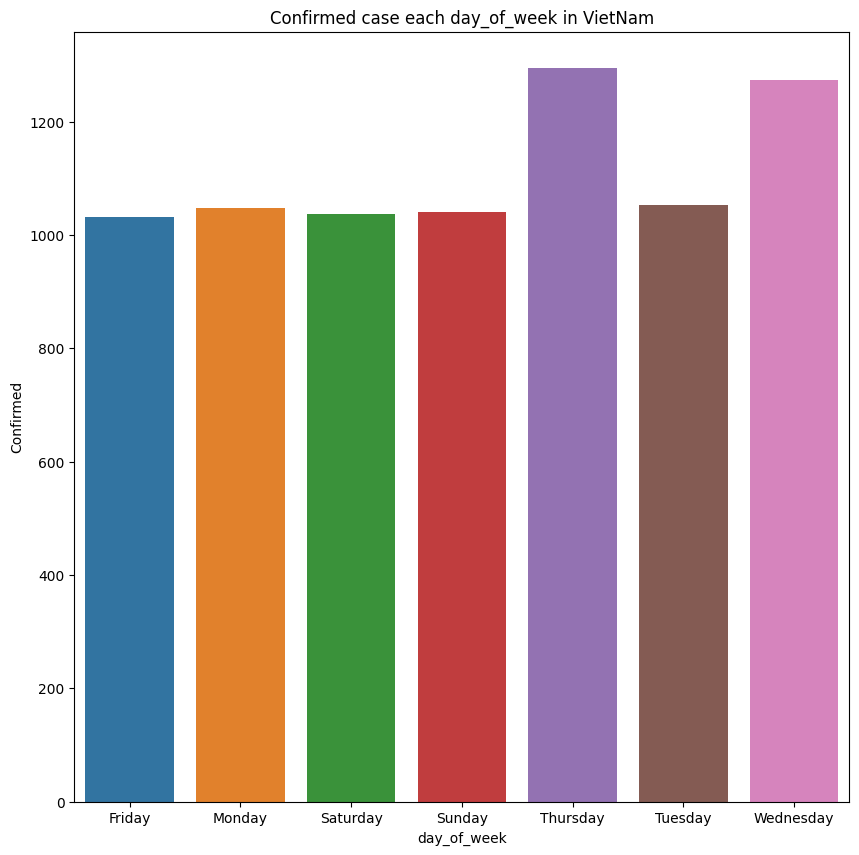

In [43]:
tmp_df = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"].dt.year == 2020) & ((df["ObservationDate"].dt.month == 4))].copy()
tmp_df['day_of_week'] = tmp_df['ObservationDate'].dt.day_name()
tmp_df = tmp_df.groupby(['day_of_week'])['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=tmp_df, x='day_of_week', y='Confirmed')
plt.title("Confirmed case each day_of_week in VietNam")
plt.show()

# Bài 5

Hãy thống kê số ca nhiễm mới tại Việt Nam trong khoảng tháng 01 - 03/2020 và tháng 01 - 03/2021, sử dụng tứ phân vị 

In [44]:
tmp_df1 = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"] >= "2020-01-1") & (df["ObservationDate"] <= "2020-03-31")].copy()
tmp_df1['Confirmed'].quantile([0, .25, .5, .75, 1])

0.00      2.0
0.25     13.0
0.50     16.0
0.75     53.0
1.00    212.0
Name: Confirmed, dtype: float64

In [45]:
tmp_df2 = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"] >= "2021-01-1") & (df["ObservationDate"] <= "2021-03-31")].copy()
tmp_df2['Confirmed'].quantile([0, .25, .5, .75, 1])

0.00    1474.0
0.25    1548.0
0.50    2248.5
0.75    2525.5
1.00    2603.0
Name: Confirmed, dtype: float64

# Bài 6

Vẽ biểu đồ so sánh tổng số ca nhiễm mới của Việt nam giữa tháng 04 năm 2019, tháng 04 năm 2020 và tháng 04 năm 2021

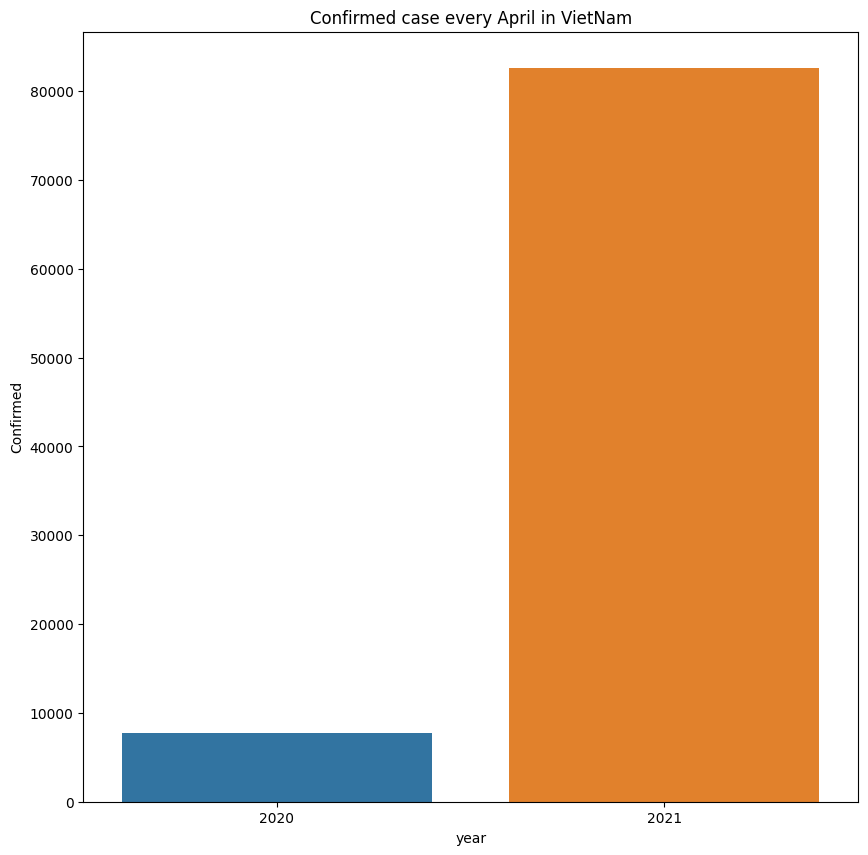

In [46]:
tmp_df = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"].dt.month == 4)].copy()
tmp_df['year'] = tmp_df['ObservationDate'].dt.year
tmp_df = tmp_df.groupby(['year'])['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=tmp_df, x='year', y='Confirmed')
plt.title("Confirmed case every April in VietNam")
plt.show()

# Bài 7 

Vẽ biểu đồ boxplot, so sánh số ca nhiễm tại Việt Nam trong khoảng tháng 01 - 03/2020 và tháng 01 - 03/2021.

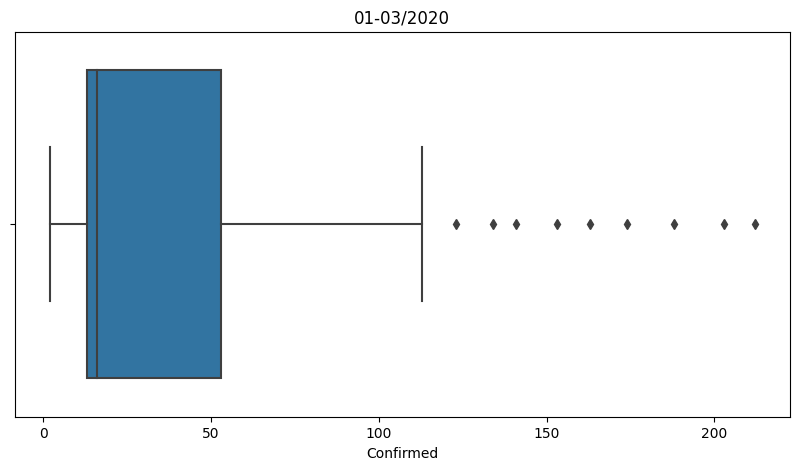

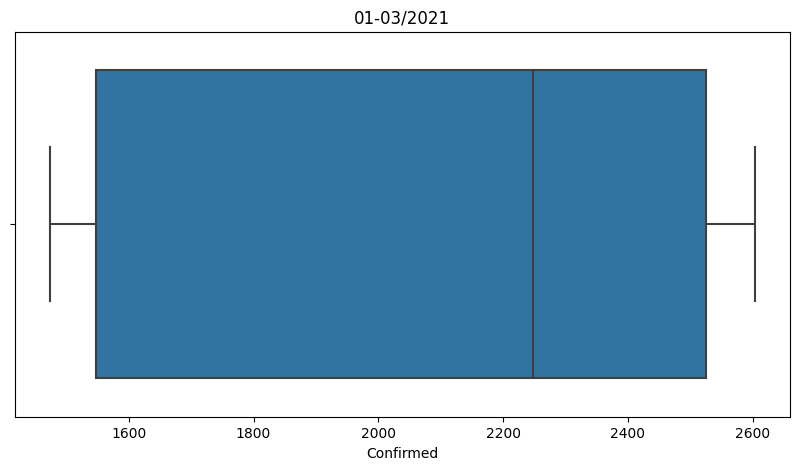

In [47]:
tmp_df1 = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"] >= "2020-01-1") & (df["ObservationDate"] <= "2020-03-31")].copy()
tmp_df2 = df[(df['Country/Region'] == 'Vietnam') & (df["ObservationDate"] >= "2021-01-1") & (df["ObservationDate"] <= "2021-03-31")].copy()

plt.figure(figsize=(10,5))
sns.boxplot(data=tmp_df1, x='Confirmed')
plt.title("01-03/2020")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=tmp_df2, x='Confirmed')
plt.title("01-03/2021")
plt.show()